# Tenserflow
## Simple_Liner_Regression_study



단순 선형회귀란?   
y = ax + b   

회귀 : 어떤 표본(샘플)의 특징은 모수(전체)의 특징을 따라간다(회귀)


Hypothesis(하이포시스, 예측, 가설) = H(x) = Wx + b   
cost = 오차 = 에러 = 잔차 제곱의 합의 평균

W = 기울기   
b = 절편

### 필요한 모듈 세팅
텐서플로우와, 넘피를 임포트 해준다.

In [1]:
import tensorflow as tf
import numpy as np

### 데이터 세팅

In [2]:
#x는 1,2,3,4,5 로 1씩 증가 되는 값을 세팅
x_data = [1,2,3,4,5]
#y는 2,4,6,8,10 으로 2씩 증가되는, 즉 x에 2를 곱한 값들로 세팅
y_data = [2,4,6,8,10]

### 데이터 확인

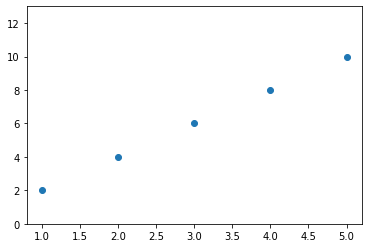

In [3]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'o')
plt.ylim(0,13)
plt.show()

앞서 단순선형회귀 방정식을.  
y = Wx + b라고 했다.

그렇다면 위 데이터로 위방정식을 구한다면,   
W = 2   
b = 0   
라는 해답을 구할수 있는데,   
이 값들을 텐서플로우로 찾아야한다.

### 초기값 설정

In [4]:
#W,b는 랜덤값으로로 설정이 가능함
W = tf.Variable(5.0)
b = tf.Variable(0.5)

#y=Wx + b
hypothesis = W * x_data+b

### 초기 값에 따른 가설값 확인

In [5]:
#초기 값에 따른 가설값은 5.5, 10.5, 15.5, 20.5, 25.5 로 확인된다.
# 5.5 = 5.0 * 1 + 0.5 등등
hypothesis = W * x_data+b
hypothesis

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 5.5, 10.5, 15.5, 20.5, 25.5], dtype=float32)>

In [6]:
#numpy를 활용해 확인가능
hypothesis.numpy()

array([ 5.5, 10.5, 15.5, 20.5, 25.5], dtype=float32)

In [7]:
#초기값으로 주어진 W, b값도 다시한번 확인
W , b

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.5>)

In [8]:
#마찬가지로 numpy로 확인가능
W.numpy(), b.numpy()

(5.0, 0.5)

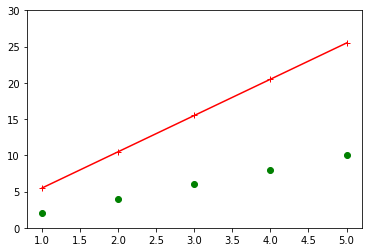

In [9]:
#그래프로 확인하기
#빨간선(선형)에 표시된 값은 이번에 구한 가설(y = hypothesis)이다.
#저 선형그래프를 초기 초기 데이터에 가장 근사하게 그려질 수있도록 만들어 줄 것이다.
plt.plot(x_data, hypothesis.numpy(), 'r-+')
plt.plot(x_data, y_data, 'go')
plt.ylim(0, 30)
plt.show()


### cost
cost란 앞서, 잔차 제곱의 합의 평균이라고 했다.   
이는 tensorflow에 직접 구현되어있는 함수가 없다.
두가지 함수를 섞어서 사용해야한다.
바로 tf.reduce_mean(평균)과 tf.square(제곱)이다.

In [10]:
#reduce_mean예시
v = [1.,2.,3.,4.]
tf.reduce_mean(v).numpy()

2.5

In [11]:
#square예시
tf.square(5).numpy()

25

In [12]:
#초기 cost도출
#cost는 에러, 오차, 이기 때문에 최대한 0에 수렴한 값이 되는것을 목표로 해야한다.
cost = tf.reduce_mean(tf.square(hypothesis - y_data))
cost.numpy()

108.25

### Gradient Descent 경사하강법
#### minimize cost(W,b)

경사하강법 : cost의 최소값을 찾는 알고리즘

In [13]:
#텐서플로우에서 경사하강법은 
#tf.GradientTape()을 with 와 함께사용한다.


#참고 : https://www.tensorflow.org/tutorials/customization/autodiff?hl=ko
#with구문안에 있는 모든 연산을 tape에 저장함
with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    
#gradient cost를 W,b로 각각 미분한 값을 W_grad와 b_grade에 입력해준다.
W_grad, b_grad = tape.gradient(cost, [W,b])
W_grad.numpy(), b_grad.numpy()

(69.0, 19.0)

In [14]:
#learning_rate란 미분한 값을 얼마만큼의 비중을두고 반영할 것인가 정하는 것이다
#0.01, 0.001, 0.0001로 흔히 정한다고함.
#작으면 작을수록 정확한 값을 찾는데 유리함, 그만큼 많은 수를 반복 해야하긴함
learning_rate = 0.01
#assign_sub란 -= 와 같은 기능이다.
W.assign_sub(learning_rate * W_grad)#5(W초기값) - 0.69 = 4.31
b.assign_sub(learning_rate * b_grad)#0.5(b초기값) - 0.19 = 0.49
W.numpy(), b.numpy()


(4.31, 0.31)

### 새로운 W,b가 반영된 hypothesis 확인

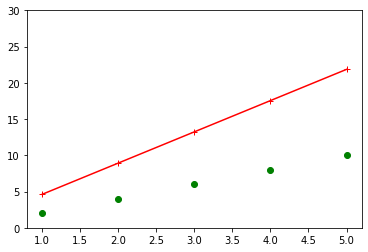

tf.Tensor([ 4.62      8.93     13.240001 17.55     21.859999], shape=(5,), dtype=float32)


In [15]:
#확인하기 위하여 한번더 선언해줌
hypothesis = W * x_data + b
plt.plot(x_data, hypothesis.numpy(), 'r-+')
plt.plot(x_data, y_data, 'go')
plt.ylim(0, 30)
plt.show()
print(hypothesis)

#점선은 기본 데이터,
#빨간 선형그래프는 반영된 W,b와 데이터의 계산으로 표시된 것이다.
#즉 
#초기값설정에서 5.5 = 5 x 1 + 0.1
#경사하강법1회 4.8 = 4.31 x 1 + 0.49
#로 변화 되었다. 이것을 반복을 통하여 최적의 값을 찾아야한다.

### 코드 합본
### 경사하강법 반복을 통한 Simple liner Regression

간단한 방정식이이였기 때문에 내가 생각한 기대값은.  
W =2 , b=0 이였다.   
하지만 텐서플로우로 찾은값은    
W = 2.06, b=-0.22 로 비교적 값에 차이가 있었다.

그래서,   

초기값을 4, 0.5로 조작,  learning_rate를 조작, 반복수 조작을 해보았다, 
위 경우 모두 값을 찾는데 영향을 주었다.

반복을 너무 많이하면 계산시간이 어마어마하게 걸린다.   

    0|    3.9953|    0.4987| 50.250000
 1000|    2.1988|    0.0029|  0.440425
 2000|    2.0303|   -0.0420|  0.004252
 3000|    2.0142|   -0.0448|  0.000407
 4000|    2.0123|   -0.0437|  0.000349
 5000|    2.0117|   -0.0423|  0.000326
 6000|    2.0113|   -0.0409|  0.000305
 7000|    2.0109|   -0.0396|  0.000285
 8000|    2.0106|   -0.0382|  0.000266
 9000|    2.0102|   -0.0370|  0.000249
10000|    2.0099|   -0.0357|  0.000233


(0.0, 30.0)

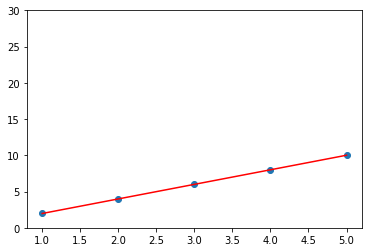

In [16]:
import tensorflow as tf
import numpy as np

x_data = [1., 2., 3., 4., 5.]
y_data = [2., 4., 6., 8., 10.]

W = tf.Variable(4.0)
b = tf.Variable(0.5)
learning_rate = 0.0001


for i in range(10001):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 1000 == 0:
        print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))
    
plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0, 30)

In [17]:
W,b

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.00991>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.03574141>)